# Exercises
## Introduction to Visualization, Mapping

The exercises for Day 1 are to develop familiarity with the APIs and fluency in the basics of plotting.

## Table of contents

*  Exercise 1: Line Chart
*  Exercise 2: Bar Chart
*  Exercise 3: Scatterplot
*  Exercise 4: Heatmap
*  Exercise 5: Transforms
*  Exercise 6: Sort

--------------
### Most of these exercises are easier using seaborn
------------

## Preamble

In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# use seaborn style
sns.set()
sns.set_style('darkgrid')

## Read in data

**SNB Money-market Rate Data**

Data on the money-market rates over various terms, including: overnight (`SARON`), call money rate (`1TGT`), 1, 3, 6, and 12-month CHF-denominated loans (`1M`, `3M0`, `6M`, `12M`, respectively), and USD, JPY, GBP, and EUR-denominated loans (`3M1`, `3M2`, `3M3`, and `3M4`, respectively)

Used in Ex 1 and 2

In [7]:
snb_df = pd.read_csv("data/snb-data-zimoma-en-all-20200901_1437.csv", sep=";", skiprows=2)
snb_df = snb_df.rename({'D0': 'Instrument'}, axis=1)
snb_df['Date'] = pd.to_datetime(snb_df['Date'])
snb_df = snb_df.set_index(['Date', 'Instrument']).unstack()['Value']
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
snb_df = snb_df[term_order]
snb_df.head()

Instrument,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**MPG Data**

Data about a selection of automobiles in two years: 1999 and 2008. Includes information about the manufacturer and model of each car, as well as data on the type of car (`class`), the size of the engine (`displ`, `cyl`), the type of transmission (`trans`), and city and highway fuel efficiency (`cty`, `hwy`) in miles/gallon of fuel units.

Used in Ex 3, 4, 5

In [8]:
mpg_df = pd.read_csv("data/mpg.csv")
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


**Antibiotics Data**

Data on the dosage of `antibiotic` (`mic` or _minimum inhibitory concentration_ in $\mu$g/ml) necessary to kill various `bacteria`, and the `gram`-type of each bacterium. 

Used in Ex 4, 5, 6

In [9]:
antibiotics_df = pd.read_json('data/burtin.json', orient='records').set_index(['bacteria', 'gram'])
antibiotics_df = antibiotics_df.stack().reset_index()
# mic = minimum inhibitory concentration
antibiotics_df.columns = ['bacteria', 'gram', 'antibiotic', 'mic']
# assign an id to each bacterium
bid_dict = {b:i for i, b in enumerate(sorted(pd.unique(antibiotics_df['bacteria'])))}
antibiotics_df['bid'] = antibiotics_df.apply(lambda x: bid_dict[x['bacteria']], 1)
# extract the genus of each bacterium
antibiotics_df['genus'] = antibiotics_df['bacteria'].apply(lambda x: x.split(" ")[0])
antibiotics_df.head()

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.0,6,Mycobacterium
1,Mycobacterium tuberculosis,negative,streptomycin,5.0,6,Mycobacterium
2,Mycobacterium tuberculosis,negative,neomycin,2.0,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.0,10,Salmonella
4,Salmonella schottmuelleri,negative,streptomycin,0.8,10,Salmonella


## Basic Plotting

## Ex. 1: Line Chart

A line chart is a standard way of showing the evolution of a variable over time. A line chart can be realized using the `plot` function in pandas or the `plot` function of a matplotlib `ax` or `pyplot` object.

### Ex. 1.1

The snb_df includes a `1TGT` column for of rates for tomorrow-next loans. Plot a line chart of this column.

<AxesSubplot:xlabel='Date'>

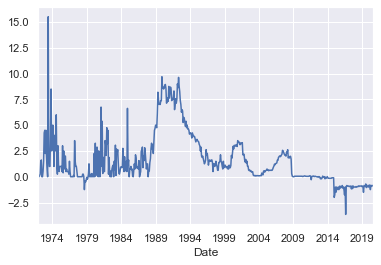

In [10]:
# pandas
snb_df["1TGT"].plot()

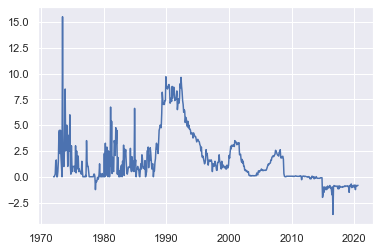

In [11]:
# matplotlib.pyplot
plt.plot(snb_df["1TGT"])

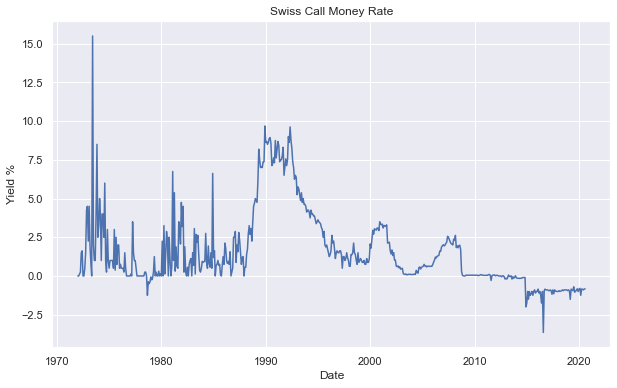

In [17]:
# real matplotlib.pyplot
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(snb_df.index, snb_df["1TGT"])

ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("Date")
ax.set_ylabel("Yield %");

### Ex 1.2

Add a title and y-axis label to the plot from Ex 1.1. The title should be `Swiss Call Money Rate`. The y-axis label should be "Yield (%)".

Text(0, 0.5, 'Yield (%)')

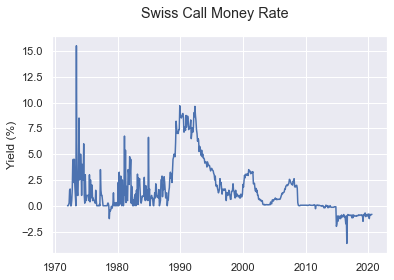

In [8]:
plt.plot(snb_df["1TGT"])

plt.suptitle('Swiss Call Money Rate')
plt.ylabel('Yield (%)')



## Ex. 2: Bar Chart

A bar chart can also show the evolution of a variable over time. This can be a good option if the data are discrete rather than continous.

A bar plot can be created using the pandas `plot.bar` function or the `bar` function on a matplotlib `ax` or `pyplot` object.

### Ex 2.1

Using the same data is an Ex.1, plot a bar chart of the *average 1TGT rate per year*. Make the figure 10x6 inches.

Step 1, group the data by year and compute the mean.

In [9]:
df_21 = snb_df.groupby([snb_df.index.year])["1TGT"].mean().reset_index()
df_21


,Date,1TGT
0,1972,1.187500
1,1973,3.677083
2,1974,2.916667
3,1975,1.302083
4,1976,0.416667
5,1977,0.635417
6,1978,-0.166667
7,1979,0.145833
8,1980,1.302083
9,1981,2.546875


Step 2, plot the mean `1TGT` series.

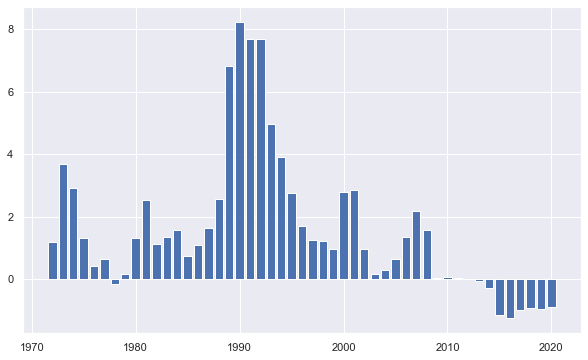

In [10]:
plt.figure(figsize=(10, 6))

plt.bar(df_21["Date"], df_21["1TGT"]);

## Ex 2.2

Take the plot from Ex 2.1 and make the following changes:
- Add a title: `Average Swiss Call Money Rate by Year`
- Set the y-axis label to `Yield (%)`.
- Only label every 5th year between 1975 to 2020 (e.g., 1975, 1980, 1985, etc.) on the x-axis. The other years should have no label.

<BarContainer object of 49 artists>

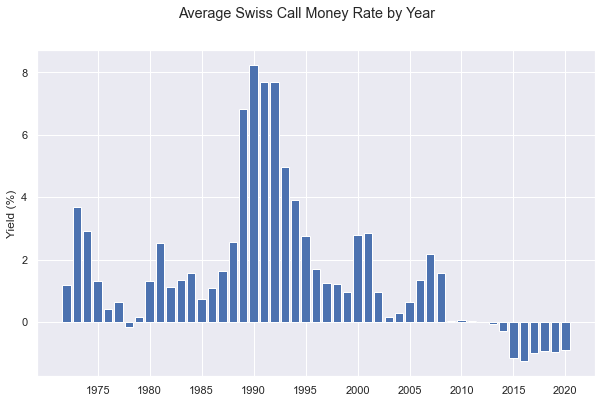

In [11]:
plt.figure(figsize=(10, 6))
plt.suptitle('Average Swiss Call Money Rate by Year')
plt.ylabel('Yield (%)')
plt.xticks(np.arange(1975,2021,5))
plt.bar(df_21["Date"], df_21["1TGT"])

## Ex 3: Scatterplot

A scatterplot can be used to show any relationship between two variables.

### Ex 3.1

Using the `mpg_df` dataframe, make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis. Give the plot the title `Highway vs. City Fuel Mileage`, and label the x-axis `Highway` and the y-axis `City`.

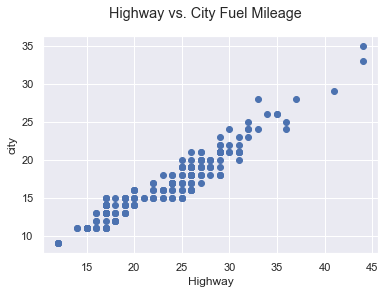

In [27]:
plt.scatter(mpg_df["hwy"], mpg_df["cty"])

plt.suptitle('Highway vs. City Fuel Mileage')
plt.xlabel("Highway")
plt.ylabel("city");

### Ex 3.2

As in 3.1 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis.
This time, use different mark shapes for cars from the year 1999 and 2008. For example, draw cars from 1999 as +'s, those from 2008 as x's.

Text(0, 0.5, 'city')

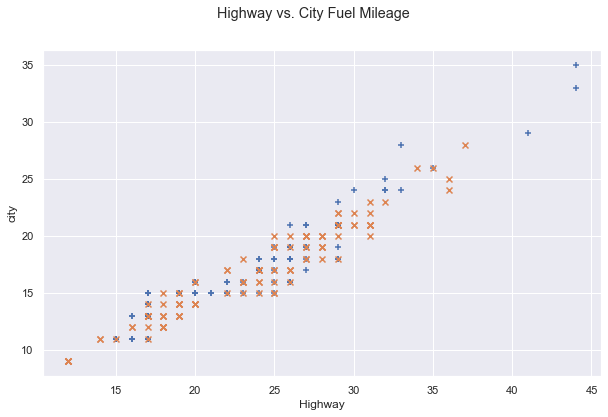

In [13]:
# Doubt to you just have this 2 years in the column you can separate each one 
# in one data frame and then create 2 scatterplots
plt.figure(figsize=(10, 6))

df_32_1999 = mpg_df[mpg_df["year"] == 1999]
df_32_2008 = mpg_df[mpg_df["year"] == 2008]
    
plt.scatter(df_32_1999["hwy"], df_32_1999["cty"], marker="+")
plt.scatter(df_32_2008["hwy"], df_32_2008["cty"], marker="x")

plt.suptitle('Highway vs. City Fuel Mileage')
plt.xlabel("Highway")
plt.ylabel("city")


### Ex 3.3

As in 3.1 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis, using the default mark shapes (dots).
This time, color all marks representing data from the year 1999 in a different color than those from 2008. Set the `alpha` of the marks to 0.5. Why are some dots neither of the two colors you explicitly selected?

Text(0, 0.5, 'city')

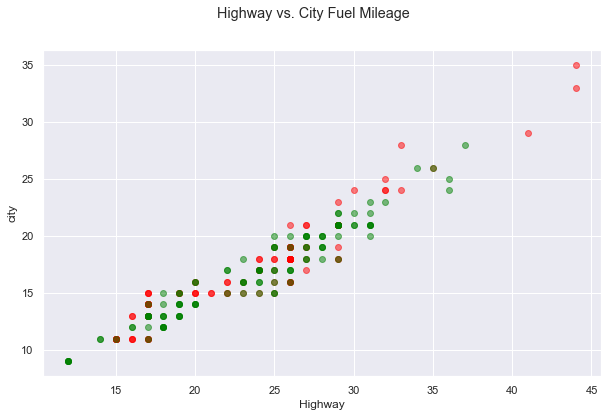

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df_32_1999["hwy"], df_32_1999["cty"], color = "red", alpha = 0.5)

plt.scatter(df_32_2008["hwy"], df_32_2008["cty"], color = "green", alpha = 0.5)

plt.suptitle('Highway vs. City Fuel Mileage')
plt.xlabel("Highway")
plt.ylabel("city")

# Because cover both variables or there are lees values with that relation

### Ex 3.4

As in 3.3 use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis. Again, color all marks representing data from the year 1999 in a different color than those from 2008, this time using two colors from the ColorBrewer `Dark2` palette.

In [15]:
pal = sns.color_palette("Dark2")
sns.color_palette("Dark2")

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [16]:
print(pal.as_hex())

['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']


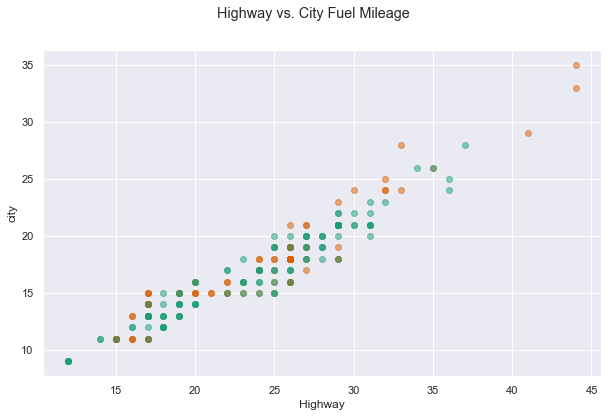

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df_32_1999["hwy"], df_32_1999["cty"], color = "#d95f02", alpha = 0.5)
plt.scatter(df_32_2008["hwy"], df_32_2008["cty"], color = "#1b9e77", alpha = 0.5)

plt.suptitle('Highway vs. City Fuel Mileage')
plt.xlabel("Highway")
plt.ylabel("city")

plt.rc('pdf',fonttype=42)
plt.savefig('sample.pdf')

# font = {'family' : 'monospace',
#        'weight' : 'bold',
#        'size'   : 'larger'}
# plt.rc('font', **font)  # pass in the font dict as kwargs

### Ex 3.5
Again, use the `mpg_df` dataframe to make a scatterplot with `hwy` on the x-axis and `cty` on the y-axis.
This time, map the `class` column of the dataframe to color. You will need a palette with seven (7) colors. All `subcompact` cars should be one color, all `compact` cars another color, etc.

In [28]:
types = set(mpg_df["class"])
types

{'2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv'}

In [29]:
pale = sns.color_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [30]:
print(pale.as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [31]:
# create a list of dataframes
df_35 = mpg_df.groupby("class")    
groups = [df_35.get_group(x).reset_index() for x in df_35.groups]

Text(0, 0.5, 'city')

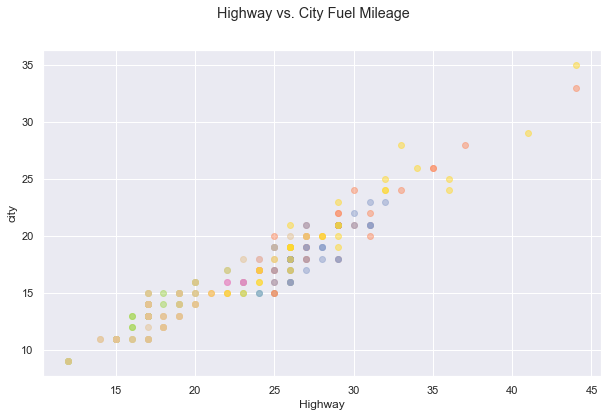

In [32]:
plt.figure(figsize=(10, 6))

for i in range(len(groups)):
    plt.scatter(groups[i]["hwy"], groups[i]["cty"], color = pale[i], alpha = 0.5)

plt.suptitle('Highway vs. City Fuel Mileage')
plt.xlabel("Highway")
plt.ylabel("city")

### Ex 3.6
Make the same plot as in 3.5, but use different mark shapes for cars from the year 1999 vs. 2008. For example, draw cars from 1999 as +'s, those from 2008 as x's.

#### This way of separate in groups could be better than divide in dfs like I did it before

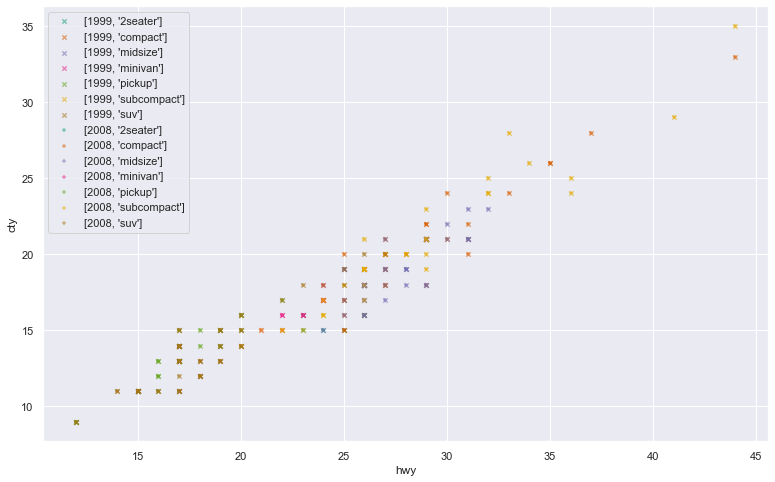

In [33]:
fig, ax = plt.subplots(figsize=(13,8))
marks = ["x", "+"]

for i, (name1, gdf) in enumerate(mpg_df.groupby('year')): # Give you number, name of the group and the subset of that roup
    for o, (name2, gdf) in enumerate(mpg_df.groupby('class')):
        gdf.plot.scatter(x="hwy", y="cty", marker=marks[i], color=pal[o], ax=ax, alpha=0.5, label=[name1, name2])

## Ex 4: Heatmap

A heatmap can be used to display three variables of data, two mapped to x and y position of a mark, the third mapped to color. The seaborn `heatmap` function provides an easy to way make heatmaps.

### Ex 4.1

Using the `antibiotics_df` dataframe, make a heatmap with `antibiotic` on the x-axis and `bacteria` on the y-axis, and the `mic` column represented using color. Label the x-axis `Bacterium`, the y-axis `Antibiotic`, and give the entire plot the title `MIC of Antibiotics`.

In [34]:
df_41 = antibiotics_df[["antibiotic", "bacteria", "mic"]].copy()
df_41_pivot = antibiotics_df.pivot("bacteria", "antibiotic", "mic")
df_41_pivot

antibiotic,neomycin,penicillin,streptomycin
bacteria,,,
Aerobacter aerogenes,1.600,870.000,1.00
Brucella abortus,0.020,1.000,2.00
Brucella antracis,0.007,0.001,0.01
Diplococcus pneumoniae,10.000,0.005,11.00
Escherichia coli,0.100,100.000,0.40
Klebsiella pneumoniae,1.000,850.000,1.20
Mycobacterium tuberculosis,2.000,800.000,5.00
Proteus vulgaris,0.100,3.000,0.10
Pseudomonas aeruginosa,0.400,850.000,2.00


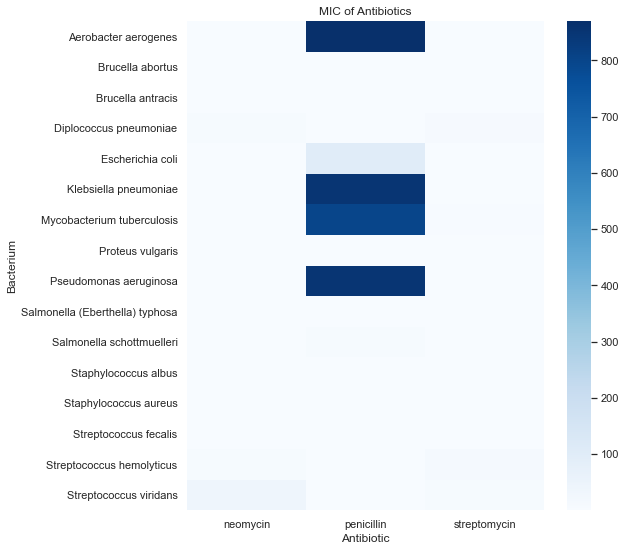

In [35]:
x_labels = "Antibiotic"
y_labels = "Bacterium"
title = "MIC of Antibiotics"

fig, ax = plt.subplots(figsize=(8,9))

ax = sns.heatmap(df_41_pivot, cmap="Blues")

ax.set_title(title)
ax.set_xlabel(x_labels)
ax.set_ylabel(y_labels);

### Ex 4.2

As in Ex 4.1, use the `antibiotics_df` dataframe to make a heatmap with `antibiotic` on the x-axis and `bacteria` on the y-axis, and the `mic` column represented using color. This time, use a log scale for the `mic` column / color mapping.

plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

fig, ax = plt.subplots()
is more concise than this:

fig = plt.figure()
ax = fig.add_subplot(111)

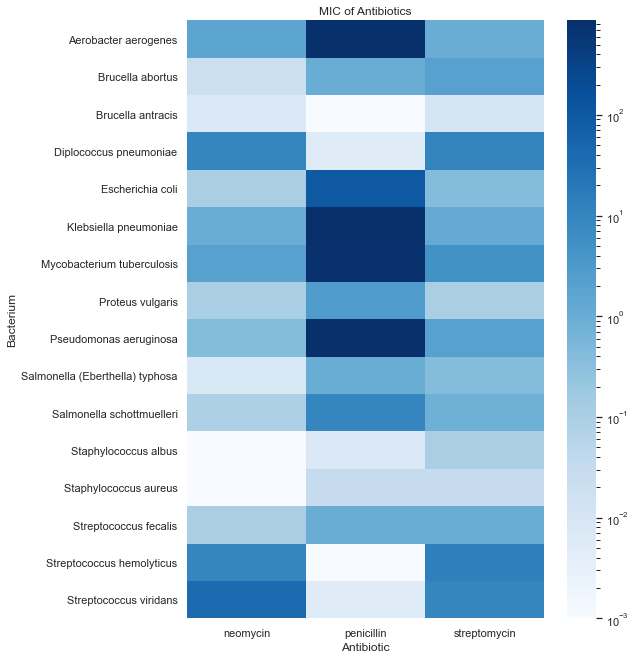

In [36]:
from matplotlib.colors import LogNorm, Normalize

fig, ax = plt.subplots(figsize=(8,11))

ax = sns.heatmap(df_41_pivot, cmap="Blues", norm=LogNorm())

ax.set_title(title)
ax.set_xlabel(x_labels)
ax.set_ylabel(y_labels);

## Ex 5: Transforms

Data transformations can make a chart easier to understand and are necessary to even be able to present the data in some cases.

### Ex 5.1

Using the `antibiotics_df` dataframe, plot the `mic` column for `penicillin` as a bar chart. Sort the values in descending order to make visualization easier to interpret.

In [37]:
df_51 = antibiotics_df[antibiotics_df["antibiotic"] == "penicillin"]
df_51

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.000,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.000,10,Salmonella
6,Proteus vulgaris,negative,penicillin,3.000,7,Proteus
9,Klebsiella pneumoniae,negative,penicillin,850.000,5,Klebsiella
12,Brucella abortus,negative,penicillin,1.000,1,Brucella
15,Pseudomonas aeruginosa,negative,penicillin,850.000,8,Pseudomonas
18,Escherichia coli,negative,penicillin,100.000,4,Escherichia
21,Salmonella (Eberthella) typhosa,negative,penicillin,1.000,9,Salmonella
24,Aerobacter aerogenes,negative,penicillin,870.000,0,Aerobacter
27,Brucella antracis,positive,penicillin,0.001,2,Brucella


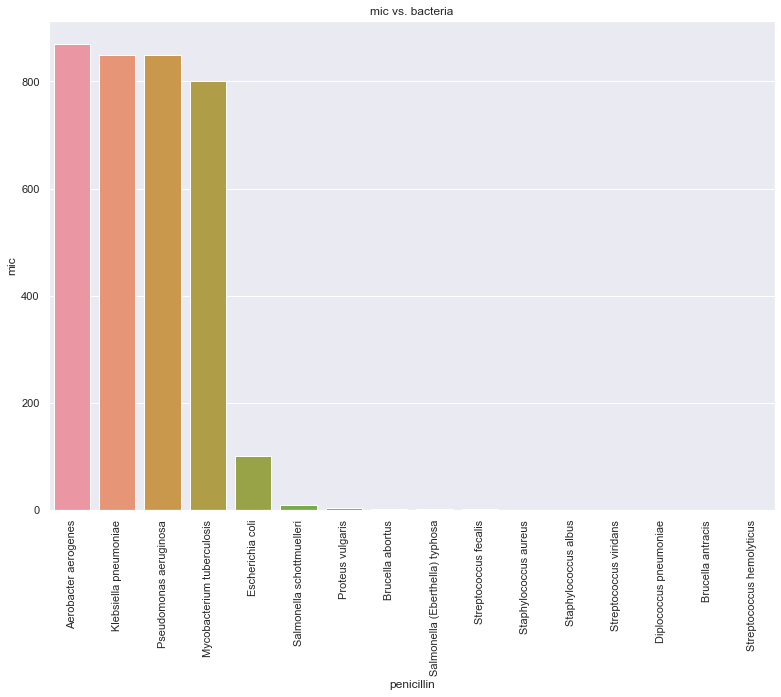

In [38]:
fig, ax = plt.subplots(figsize=(13,9))

ax = sns.barplot(x=df_51["bacteria"], y=df_51["mic"], order=df_51.sort_values("mic", ascending=False).bacteria)

ax.set_xlabel('penicillin')
ax.set_ylabel('mic')
ax.set_title('mic vs. bacteria')
ax.xaxis.set_tick_params(rotation=90)


### Ex 5.2

Make the same visualization as in 5.1, but use a log scale for the y-axis.

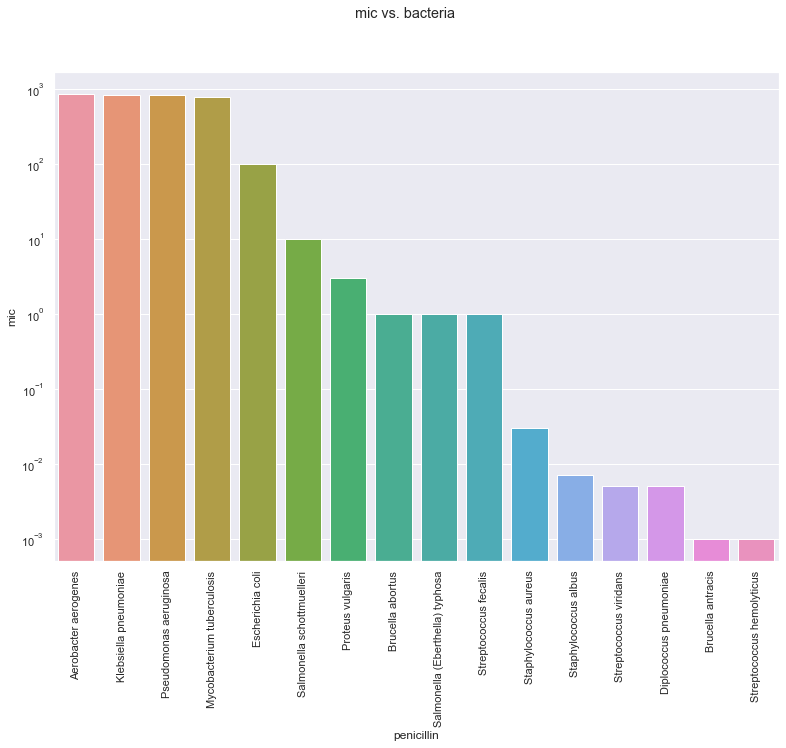

In [39]:
fig, ax = plt.subplots(figsize=(13,9))

sns.barplot(x=df_51["bacteria"], y=df_51["mic"], order=df_51.sort_values("mic", ascending=False).bacteria)

plt.xlabel('penicillin')
plt.ylabel('mic')
plt.suptitle('mic vs. bacteria')
plt.xticks(rotation=90)
plt.yscale("log")

### Ex 5.3

Make the same visualization as in 5.2, but invert the y-axis so it goes from 1000 to 0.001, where the shortest bars represent a dosage of 1000 $\mu$g/ml. What is an appropriate label for the y-axis?

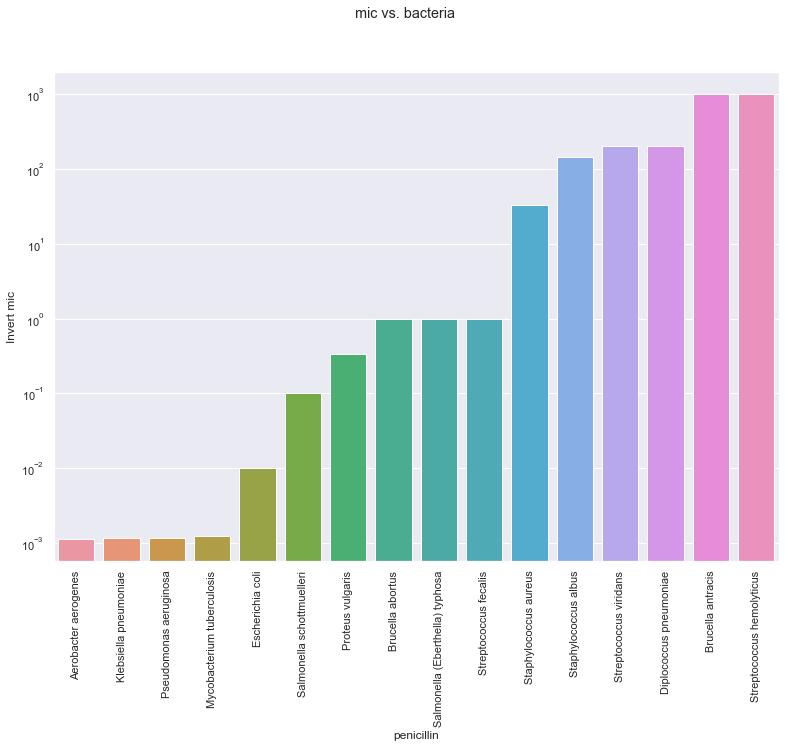

In [40]:
fig, ax = plt.subplots(figsize=(13,9))

sns.barplot(x=df_51["bacteria"], y=1/df_51["mic"], order=df_51.sort_values("mic", ascending=False).bacteria)

plt.xlabel('penicillin')
plt.ylabel('Invert mic')
plt.suptitle('mic vs. bacteria')
plt.xticks(rotation=90)
plt.yscale("log")

### Ex 5.4

Take the solution from 5.3, but additionally color the gram positive bacteria differently from the gram negative bacteria.

Step 1, create a data frame that contains the MIC of penicillin and the gram of each bacterium

In [41]:
# try to solve this yourself. If you are stuck, uncomment the next line and execute this cell
# %load fragment-5.4.1.py

Step 2, plot

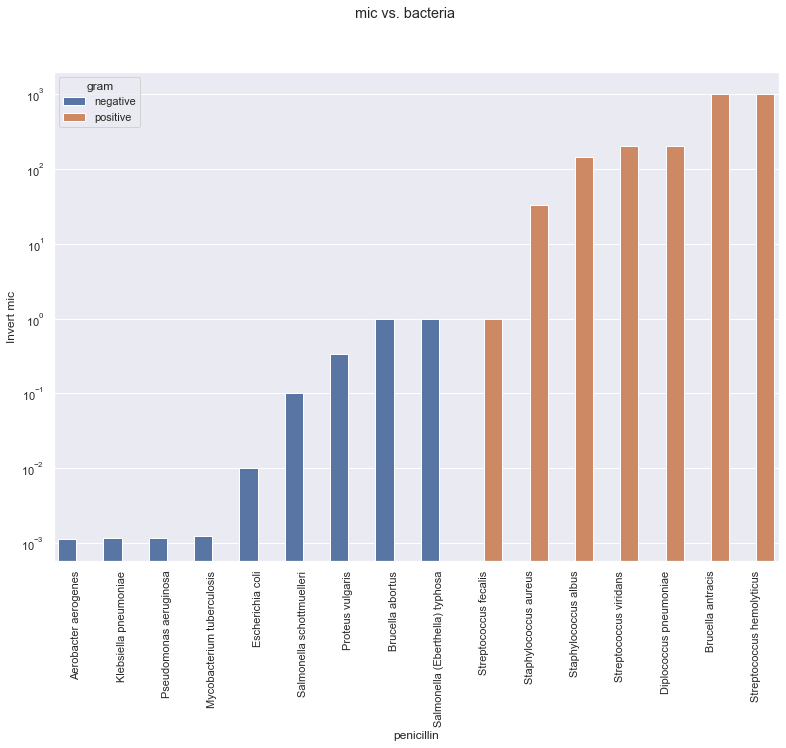

In [42]:
fig, ax = plt.subplots(figsize=(13,9))

sns.barplot(x=df_51["bacteria"], y=1/df_51["mic"], order=df_51.sort_values("mic", ascending=False).bacteria, hue=df_51["gram"])

plt.xlabel('penicillin')
plt.ylabel('Invert mic')
plt.suptitle('mic vs. bacteria')
plt.xticks(rotation=90)
plt.yscale("log")

## Ex 6: Sort

### Ex 6.1

Redo the heatmap from 4.2, this time sort the rows by dosage of `neomycin` in ascending order. This will structure and make it easier to interpret the plot.

In [43]:
df_61_pivot = df_41_pivot.sort_values("neomycin")
df_61_pivot

antibiotic,neomycin,penicillin,streptomycin
bacteria,,,
Staphylococcus albus,0.001,0.007,0.10
Staphylococcus aureus,0.001,0.030,0.03
Brucella antracis,0.007,0.001,0.01
Salmonella (Eberthella) typhosa,0.008,1.000,0.40
Brucella abortus,0.020,1.000,2.00
Salmonella schottmuelleri,0.090,10.000,0.80
Escherichia coli,0.100,100.000,0.40
Proteus vulgaris,0.100,3.000,0.10
Streptococcus fecalis,0.100,1.000,1.00


Text(48.45312499999999, 0.5, 'Bacterium')

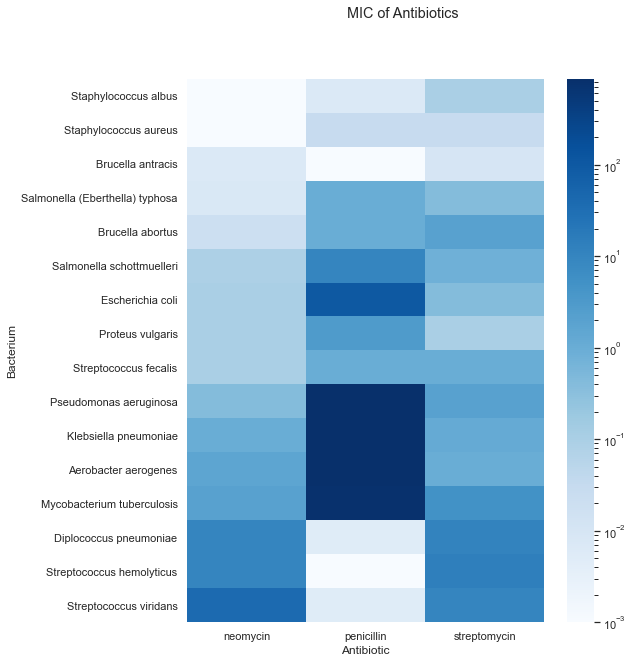

In [44]:
from matplotlib.colors import LogNorm, Normalize

fig, ax = plt.subplots(figsize=(8,10))

sns.heatmap(df_61_pivot, cmap="Blues", norm=LogNorm())

plt.suptitle(title)
plt.xlabel(x_labels)
plt.ylabel(y_labels)